In [2]:
import tensorflow as tf


In [15]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout


In [16]:
train_ds = keras.utils.image_dataset_from_directory(
    directory =r'D:\projects\mlprojects\dogvscat\train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size =(256,256)
)

test_ds = keras.utils.image_dataset_from_directory(
    directory =r'D:\projects\mlprojects\dogvscat\test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size =(256,256)
)

Found 557 files belonging to 2 classes.


Found 140 files belonging to 2 classes.


In [5]:
#normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

    train_ds = train_ds.map(process)
    validation_ds = validation_ds.map(process)

In [18]:
# create CNN model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding= 'valid' ,activation = 'relu', input_shape = (255,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding= 'valid' ,activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(128,kernel_size=(3,3),padding= 'valid' ,activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation= 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation = 'sigmoid'))



C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 253, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 253, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 126, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 124, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 124, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [20]:
# model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# history = model.fit(train_ds, epochs=10,validation_data= validation_ds)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_ds, epochs=10, validation_data=test_ds)


Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.4883 - loss: 7.1857 - val_accuracy: 0.5286 - val_loss: 33.2841
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.5835 - loss: 3.9277 - val_accuracy: 0.5000 - val_loss: 25.0953
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.6212 - loss: 3.6195 - val_accuracy: 0.4929 - val_loss: 6.4934
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.7056 - loss: 2.4717 - val_accuracy: 0.5214 - val_loss: 2.3231
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.7253 - loss: 1.9680 - val_accuracy: 0.5214 - val_loss: 4.1322
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.7702 - loss: 1.5591 - val_accuracy: 0.5000 - val_loss: 6.1380
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.7792 - loss: 1.5395 - val_accuracy: 0.5000 - val_loss: 3.9308
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.8276 - loss: 1.0516 - val_accuracy: 0.5071 - val_los

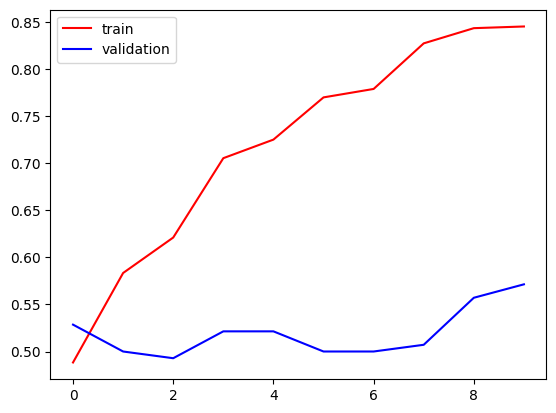

In [21]:
import matplotlib.pyplot as plt 
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

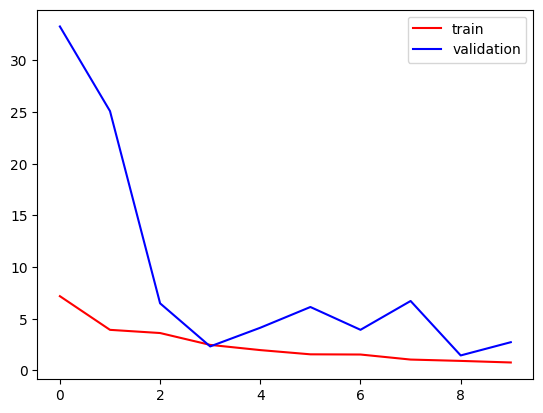

In [22]:
plt.plot(history.history['loss'],color='red',label ='train')
plt.plot(history.history['val_loss'],color='blue',label ='validation')
plt.legend()
plt.show()

In [23]:
import cv2

In [27]:
test_img = cv2.imread(r'D:\projects\mlprojects\dogvscat\train\dogs\dog_8.jpg')

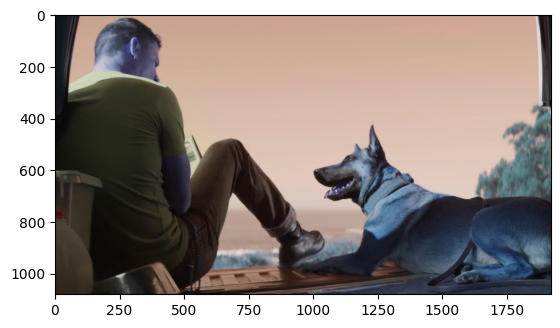

In [28]:
plt.imshow(test_img)

In [29]:
test_img.shape

(1080, 1920, 3)

In [30]:
test_img = cv2.resize(test_img,(256,256))

In [31]:
test_input = test_img.reshape(1,256,256,3)

In [32]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


array([[0.9999646]], dtype=float32)